Tema2 SPG
Lidia Istrate 342C4

Please enter I (Intervals) or S (Segmentation) or N (None):
I
Please enter I (Intervals) or S (Segmentation) or N (None):
I


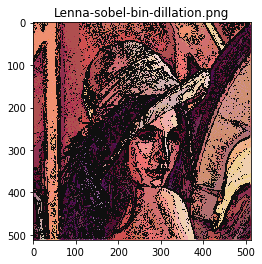

In [21]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_name_extension = "Lenna.png"
image_name = "Lenna"


image = np.array(Image.open(image_name_extension)).astype(np.uint8)


threshold = 120

def get_sobel_image(image):
    
    matrix_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    matrix_sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


    if len(image.shape) == 3:
        height, width, channels = image.shape

        rgb_image_sobel = np.zeros((height, width, channels))

        for channel in range(channels):
            for i in range(1, height - 1):
                for j in range(1, width - 1): 
                    g_x = (matrix_sobel_x[0, 0] * image[i - 1, j - 1, channel]) + \
                                (matrix_sobel_x[0, 1] * image[i - 1, j, channel]) + \
                                (matrix_sobel_x[0, 2] * image[i - 1, j + 1, channel]) + \
                                (matrix_sobel_x[1, 0] * image[i, j - 1, channel]) + \
                                (matrix_sobel_x[1, 1] * image[i, j, channel]) + \
                                (matrix_sobel_x[1, 2] * image[i, j + 1, channel]) + \
                                (matrix_sobel_x[2, 0] * image[i + 1, j - 1, channel]) + \
                                (matrix_sobel_x[2, 1] * image[i + 1, j, channel]) + \
                                (matrix_sobel_x[2, 2] * image[i + 1, j + 1, channel])

                    g_y = (matrix_sobel_y[0, 0] * image[i - 1, j - 1, channel]) + \
                                (matrix_sobel_y[0, 1] * image[i - 1, j, channel]) + \
                                (matrix_sobel_y[0, 2] * image[i - 1, j + 1, channel]) + \
                                (matrix_sobel_y[1, 0] * image[i, j - 1, channel]) + \
                                (matrix_sobel_y[1, 1] * image[i, j, channel]) + \
                                (matrix_sobel_y[1, 2] * image[i, j + 1, channel]) + \
                                (matrix_sobel_y[2, 0] * image[i + 1, j - 1, channel]) + \
                                (matrix_sobel_y[2, 1] * image[i + 1, j, channel]) + \
                                (matrix_sobel_y[2, 2] * image[i + 1, j + 1, channel])


                    rgb_image_sobel[i - 1, j - 1, channel] = np.sqrt(pow(g_x, 2.0) + pow(g_y, 2.0))

        image_after_sobel = rgb_image_sobel[:,:,0] + rgb_image_sobel[:,:,1] + rgb_image_sobel[:,:,2]

    else:
        height, width = image.shape

        one_image_sobel = np.zeros((height, width))

        for i in range(1, height - 1):
            for j in range(1, width - 1):
                g_x = (matrix_sobel_x[0, 0] * image[i - 1, j - 1]) + \
                            (matrix_sobel_x[0, 1] * image[i - 1, j]) + \
                            (matrix_sobel_x[0, 2] * image[i - 1, j + 1]) + \
                            (matrix_sobel_x[1, 0] * image[i, j - 1]) + \
                            (matrix_sobel_x[1, 1] * image[i, j]) + \
                            (matrix_sobel_x[1, 2] * image[i, j + 1]) + \
                            (matrix_sobel_x[2, 0] * image[i + 1, j - 1]) + \
                            (matrix_sobel_x[2, 1] * image[i + 1, j]) + \
                            (matrix_sobel_x[2, 2] * image[i + 1, j + 1])

                g_y = (matrix_sobel_y[0, 0] * image[i - 1, j - 1]) + \
                            (matrix_sobel_y[0, 1] * image[i - 1, j]) + \
                            (matrix_sobel_y[0, 2] * image[i - 1, j + 1]) + \
                            (matrix_sobel_y[1, 0] * image[i, j - 1]) + \
                            (matrix_sobel_y[1, 1] * image[i, j]) + \
                            (matrix_sobel_y[1, 2] * image[i, j + 1]) + \
                            (matrix_sobel_y[2, 0] * image[i + 1, j - 1]) + \
                            (matrix_sobel_y[2, 1] * image[i + 1, j]) + \
                            (matrix_sobel_y[2, 2] * image[i + 1, j + 1])

                one_image_sobel[i - 1, j - 1] = np.sqrt(pow(g_x, 2.0) + pow(g_y, 2.0))

        image_after_sobel = one_image_sobel[:,:]
        
    return image_after_sobel

def get_binarisation_image(threshold, image):

    image_after_sobel = get_sobel_image(image)

    height, width = image_after_sobel.shape

    for i in range(0, height):
        for j in range(0, width):
            if image_after_sobel[i, j] < threshold:
                image_after_sobel[i, j] = 0
            else:
                image_after_sobel[i, j] = 255
                
    return image_after_sobel

def get_dillation_image(threshold, image):
    binarisation_image = get_binarisation_image(threshold, image)
    
    height, width, channels = image.shape
    dillation_image = image.copy()
    
    height, width = binarisation_image.shape
    
    for i in range(0, height):
        for j in range(0, width):
            if binarisation_image[i, j] == 255:
                for channel in range(channels):
                    dillation_image[i, j, channel] = 0
    return dillation_image    



def get_value_from_intervals(value):
    
    if value >= 0 and value <= 31:
        return 15
    elif value >= 32 and value <= 63:
        return 47
    elif value >= 64 and value <= 95:
        return 79
    elif value >= 96 and value <= 127:
        return 111
    elif value >= 128 and value <= 159:
        return 143
    elif value >= 160 and value <= 191:
        return 175
    elif value >= 192 and value <= 223:
        return 207
    elif value >= 224 and value <= 255:
        return 239
    
    return 255

def apply_colors_intervals(image):
    
    result_image = image.copy()
    
    if len(result_image.shape) < 3:
        height, width = result_image.shape
        
        for i in range(0, height):
            for j in range(0, width):
                result_image[i, j] = get_value_from_intervals(result_image[i, j])        
        
    else:
        height, width, channels = result_image.shape

        for i in range(0, height):
            for j in range(0, width):
                for channel in range(channels):
                    result_image[i, j, channel] = get_value_from_intervals(result_image[i, j, channel])
            
    return result_image
   
def apply_formula_region(region, value, threshold):
    
    difference = 0
    
    mean_value = 0
    
    for v in region:
        mean_value += v
        
    mean_value = mean_value / len(region)

    difference = abs(value - mean_value)
    
    mean_value_prim = (mean_value * len(region) + value) / (len(region) + 1)
    
    standard_deviation_prim = 0
    
    sum_vals = 0
    
    for v in region:
        sum_vals += (v - mean_value_prim) * (v - mean_value_prim)
        
    sum_vals += (value - mean_value_prim) * (value - mean_value_prim)
    
    standard_deviation_prim = sqrt(sum_vals / len(region))
    
    test_value = (1 - (standard_deviation_prim / mean_value_prim)) * threshold
    
    if difference <= test_value:
        return (True, difference)
    else:
        return (False, difference)
  
def apply_extend_segmentation(image):
    
    result_image = image.copy()
    regions_red = []
    regions_green = []
    regions_blue = []
    regions = []
    
    if len(result_image.shape) < 3:
        height, width = result_image.shape
        
        pixel_region = []
        
        for i in range(0, height):
            pixel_region[i].append([])
            for j in range(0, width):
                pixel_region[i][j].append(-1)
                #result_image[i, j] = get_value_from_intervals(result_image[i, j])        
        
    else:
        height, width, channels = result_image.shape

        pixel_region = []
        
        for i in range(0, height):
            pixel_region[i].append([])
            for j in range(0, width):
                for channel in range(channels):
                    pixel_region[i][j].append(-1)
                    #result_image[i, j, channel] = get_value_from_intervals(result_image[i, j, channel])
            
    return result_image


color_palette_type = input("Please enter I (Intervals) or S (Segmentation) or N (None):\n")
    
if color_palette_type == 'N':
    image = image
elif color_palette_type == 'I':
    image = apply_colors_intervals(image)
    
dillation_image = get_dillation_image(threshold, image)

color_palette_type = input("Please enter I (Intervals) or S (Segmentation) or N (None):\n")

if color_palette_type == 'N':
    dillation_image = dillation_image
elif color_palette_type == 'I':
    dillation_image = apply_colors_intervals(dillation_image)

plt.figure()
plt.title(image_name + '-sobel-bin-dillation.png')
plt.imsave(image_name + '-sobel-bin-dillation.png', dillation_image, format='png')
plt.imshow(dillation_image)
plt.show()